In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('/content/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [72]:
data.duplicated().sum()

0

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [74]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [75]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [76]:
data.columns = data.columns.str.strip()

In [77]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [78]:
data.drop(columns = 'loan_id', inplace=True)

In [79]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [80]:
num_columns = data.select_dtypes(include = ['int', 'float'])
cat_columns = data.select_dtypes(include = ['object']).drop(columns = 'loan_status')

In [81]:
num_columns.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


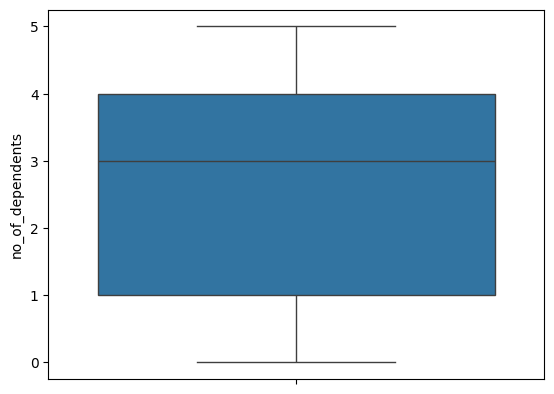

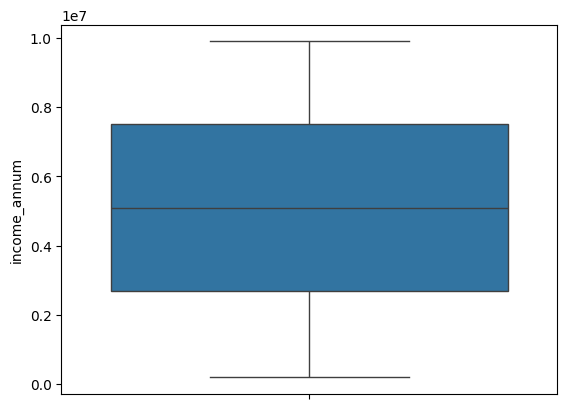

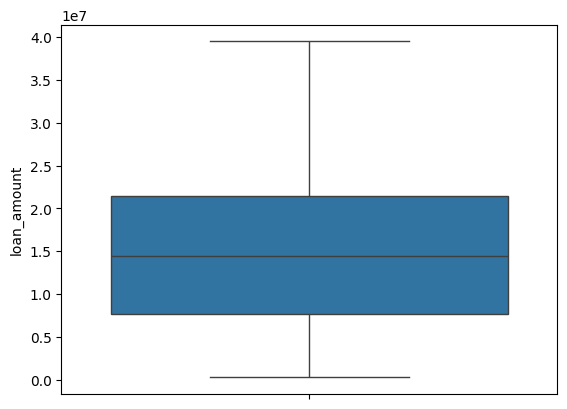

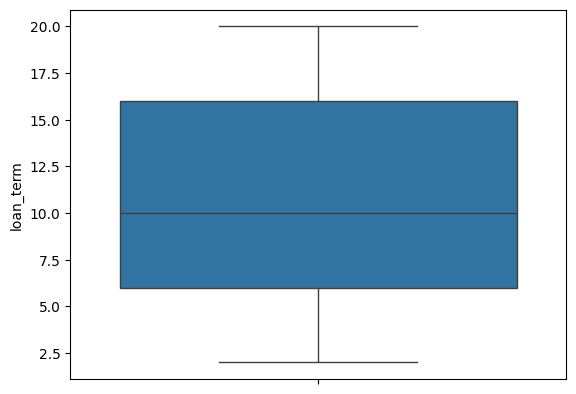

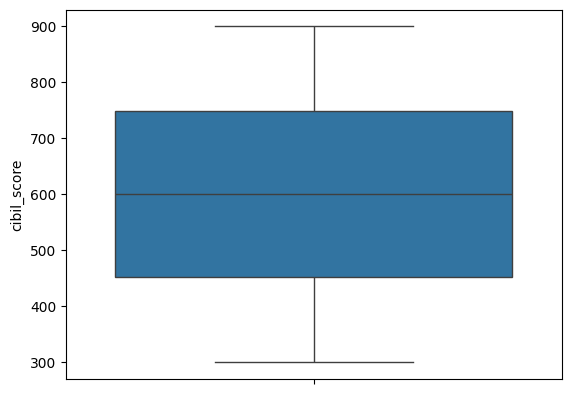

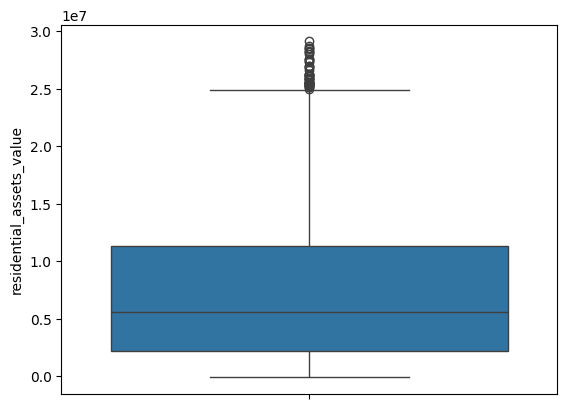

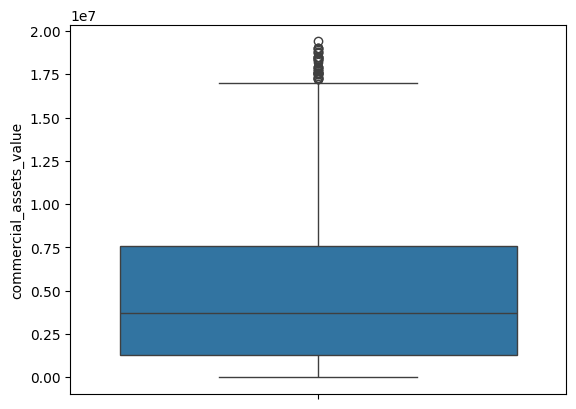

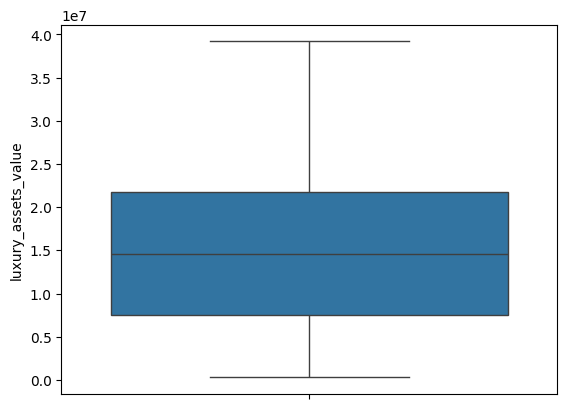

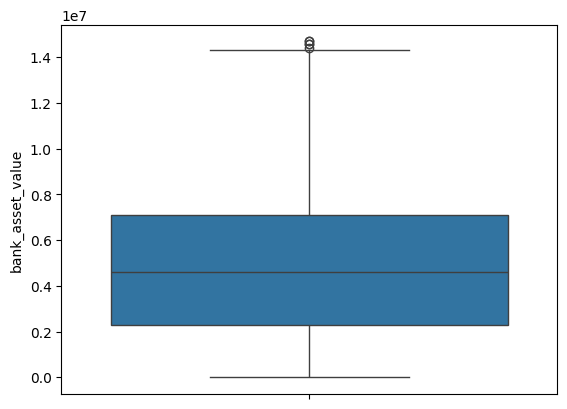

In [82]:
for col in num_columns.columns:
  sns.boxplot(data[col])
  plt.show()

In [83]:
num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [84]:
cat_columns.head()

,education,self_employed
0,Graduate,No
1,Not Graduate,Yes
2,Graduate,No
3,Graduate,No
4,Not Graduate,Yes


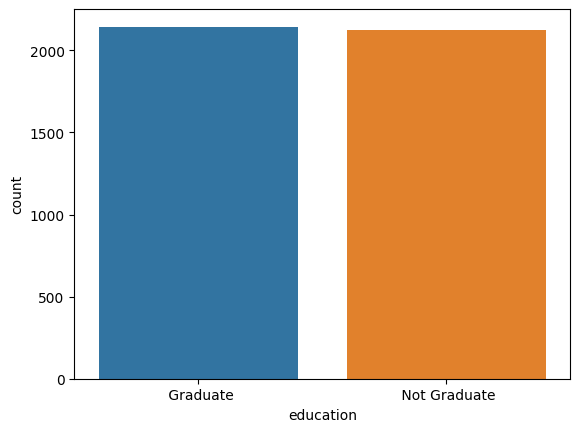

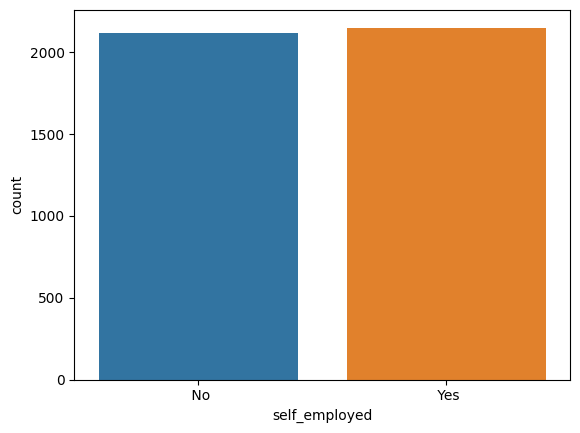

In [85]:
for col in cat_columns.columns:
  sns.countplot(x = col, hue = col, data = data)
  plt.show()

In [86]:
for col in cat_columns.columns:
  print(f"value counts of {col}")
  print(data[col].value_counts())
  print('\n')

value counts of education
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


value counts of self_employed
self_employed
Yes    2150
No     2119
Name: count, dtype: int64




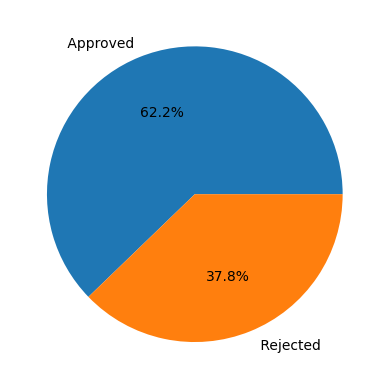

In [87]:
loan_counts = data['loan_status'].value_counts(normalize=True)
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%')
plt.show()

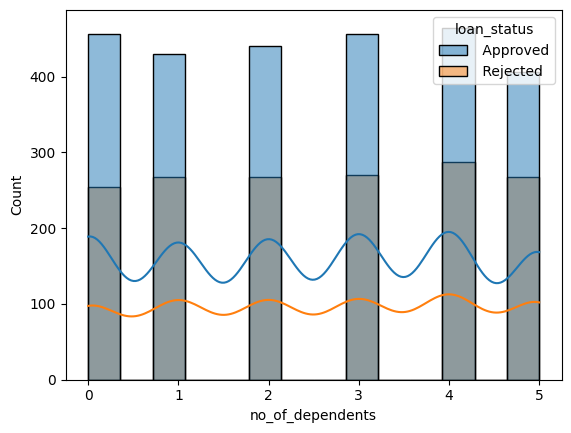

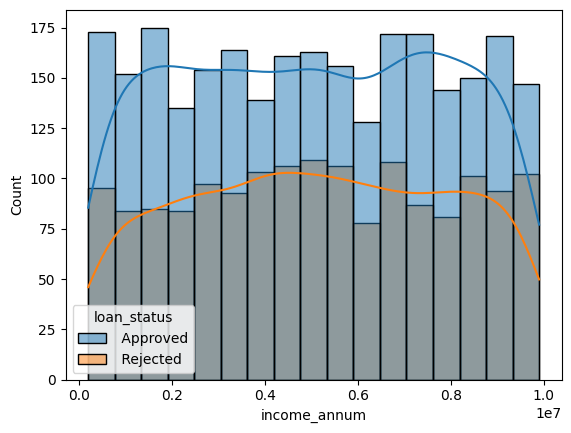

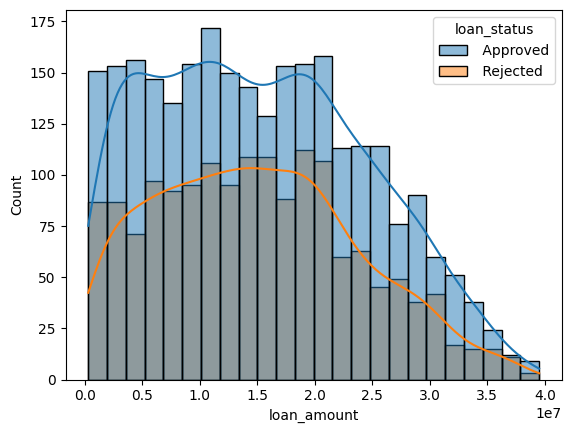

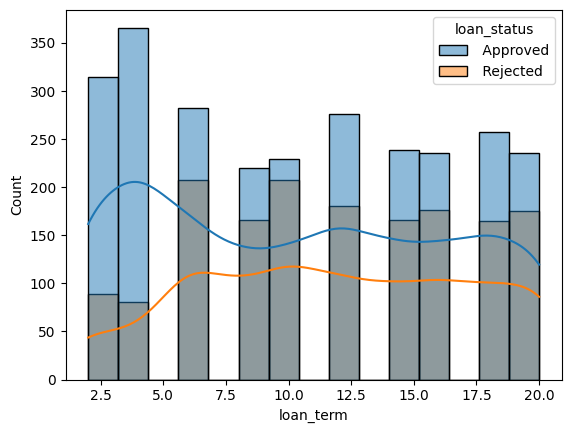

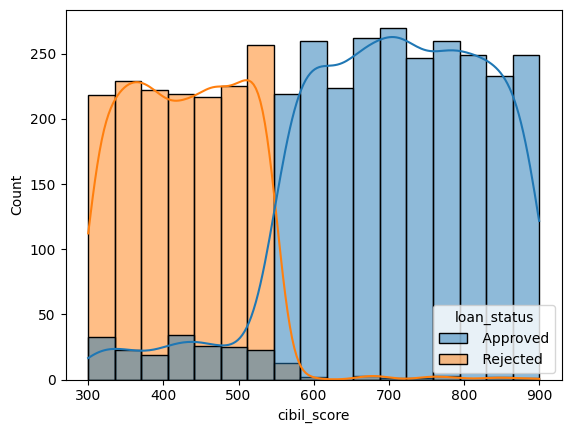

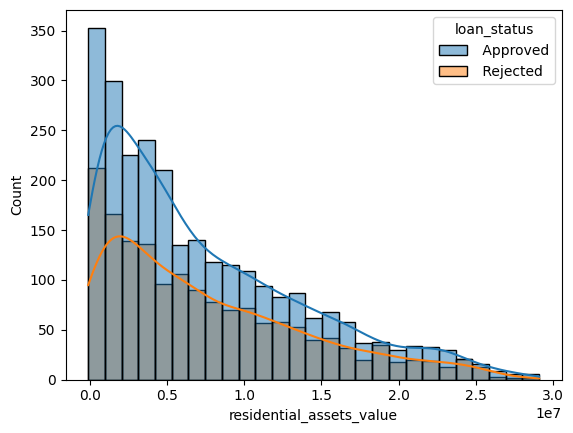

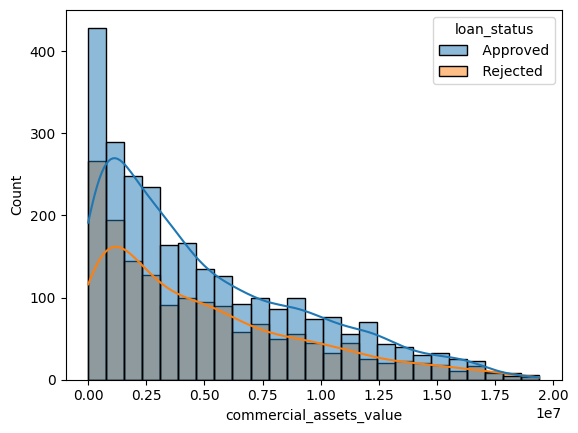

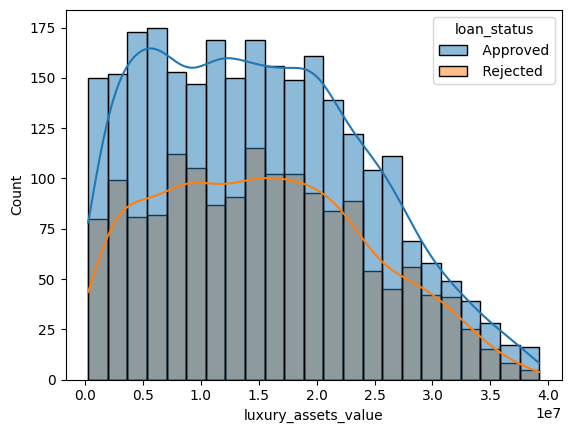

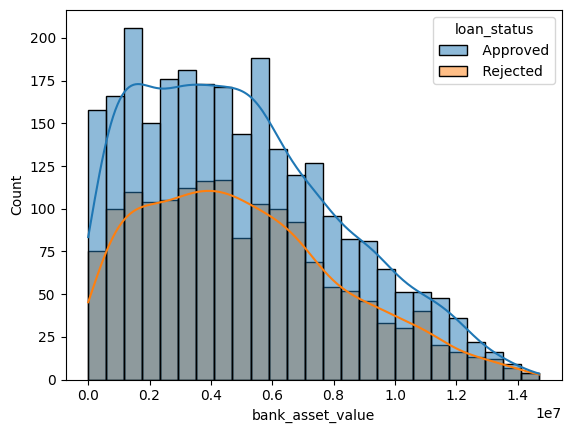

In [88]:
for col in num_columns.columns:
  sns.histplot(data = data, x = col, hue = 'loan_status', kde = True)
  plt.show()

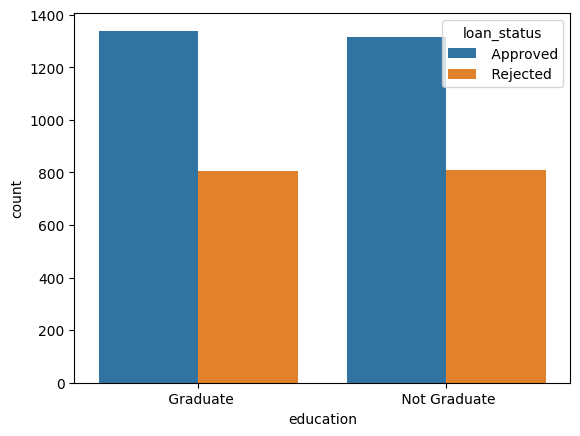

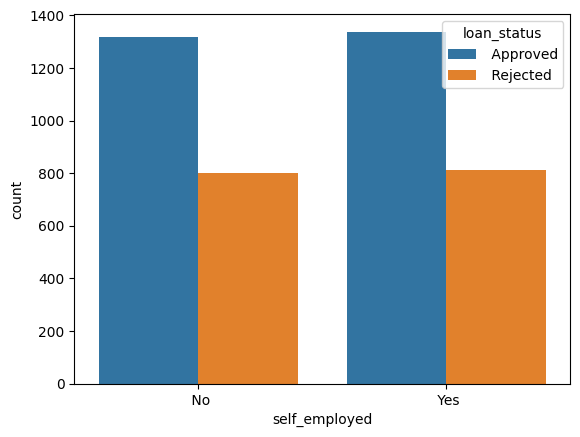

In [89]:
for col in cat_columns.columns:
  sns.countplot(data = data, x = col, hue = 'loan_status')
  plt.show()

In [90]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [97]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [98]:
data.groupby('loan_status')[['loan_amount', 'income_annum']].describe().T

loan_status           Approved    Rejected
loan_amount  count     2656.00     1613.00
             mean  15247251.51 14946063.24
             std    9221695.94  8741389.51
             min     300000.00   300000.00
             25%    7500000.00  7900000.00
             50%   14600000.00 14500000.00
             75%   22100000.00 20800000.00
             max   39500000.00 38200000.00
income_annum count     2656.00     1613.00
             mean   5025903.61  5113825.17
             std    2827228.24  2772946.42
             min     200000.00   200000.00
             25%    2600000.00  2800000.00
             50%    5000000.00  5100000.00
             75%    7500000.00  7500000.00
             max    9900000.00  9900000.00

In [99]:
pd.crosstab(data['education'], data['loan_status'])

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


In [101]:
pd.pivot_table(data, index = 'loan_status', values = ['residential_assets_value', 'commercial_assets_value', 'cibil_score'],
               columns = 'self_employed', aggfunc = 'mean', margins = True, margins_name = 'Total').T

loan_status                              Approved   Rejected      Total
                         self_employed                                 
cibil_score               No               703.96     431.00     600.78
                          Yes              702.97     427.96     599.10
                         Total             703.46     429.47     599.94
commercial_assets_value   No           5158118.36 4879275.91 5052713.54
                          Yes          4846935.72 4973522.17 4894744.19
                         Total         5001355.42 4926720.40 4973155.31
residential_assets_value  No           7444157.81 7412983.77 7432373.76
                          Yes          7356128.55 7769581.28 7512279.07
                         Total         7399811.75 7592498.45 7472616.54

In [102]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [103]:
data = pd.get_dummies(data, columns = ['education', 'self_employed'], dtype = int)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,1,0,1


In [104]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['loan_status'] = encoder.fit_transform(data['loan_status'])
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,0,1,0,1


In [105]:
X = data.drop(columns = 'loan_status')
y = data['loan_status']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [107]:
num_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
                    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [109]:
X_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1224,-1.46,1.70,0.98,0.55,-0.81,-1.00,1.94,0.66,0.70,1,0,0,1
478,0.31,-0.51,-0.72,-0.50,1.11,-0.31,0.22,-0.58,0.08,0,1,0,1
3065,-0.28,-1.09,-1.23,0.55,-0.56,-0.39,-0.80,-1.07,-1.13,0,1,1,0
326,-0.28,-0.41,-0.42,0.20,-0.48,-0.67,-1.14,-0.52,-0.11,0,1,0,1
2991,0.31,-0.98,-0.73,0.20,-0.24,-0.59,-0.82,-0.98,-1.13,0,1,1,0


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [112]:
lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state = 42)
ab_model = AdaBoostClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state = 42)
nb_model = GaussianNB()

def build_evaluate_models(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model, nb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

build_evaluate_models(X_train, X_test, y_train, y_test)

Logistic Regression Metrics:
Accuracy: 0.9227166276346604
Precision: 0.9158576051779935
Recall: 0.8761609907120743
F1 Score: 0.8955696202531646
Confusion Matrix:
[[505  26]
 [ 40 283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



Decision Tree Metrics:
Accuracy: 0.977751756440281
Precision: 0.9810126582278481
Recall: 0.9597523219814241
F1 Score: 0.9702660406885759
Confusion Matrix:
[[525   6]
 [ 13 310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98 

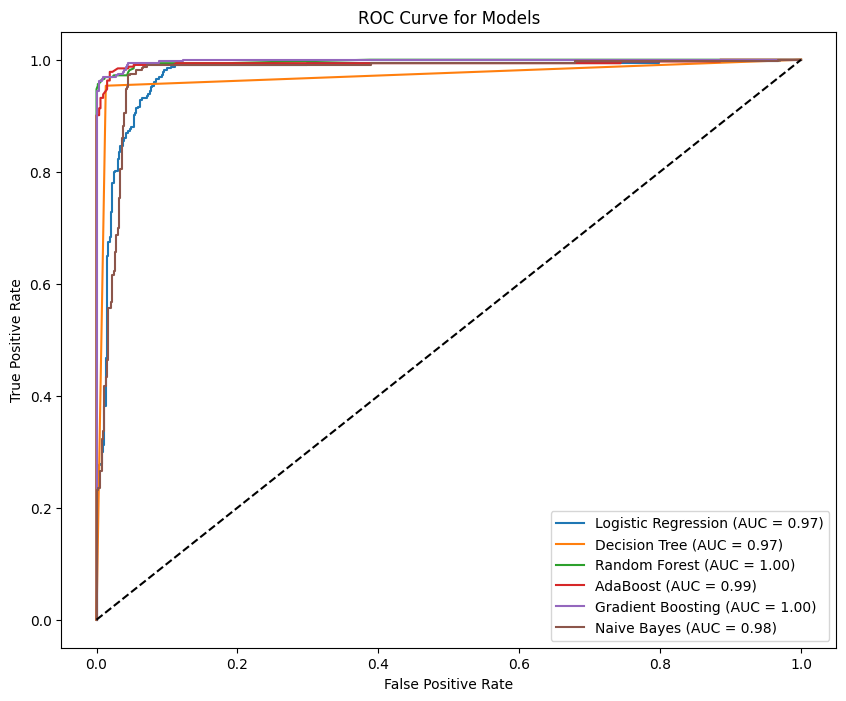

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score


def build_models_roc_curve(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model, nb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']
  plt.figure(figsize=(10, 8))
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = f'{name} (AUC = {auc_score:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("ROC Curve for Models")
  plt.legend(loc = 'lower right')
  plt.show()

build_models_roc_curve(X_train, X_test, y_train, y_test)





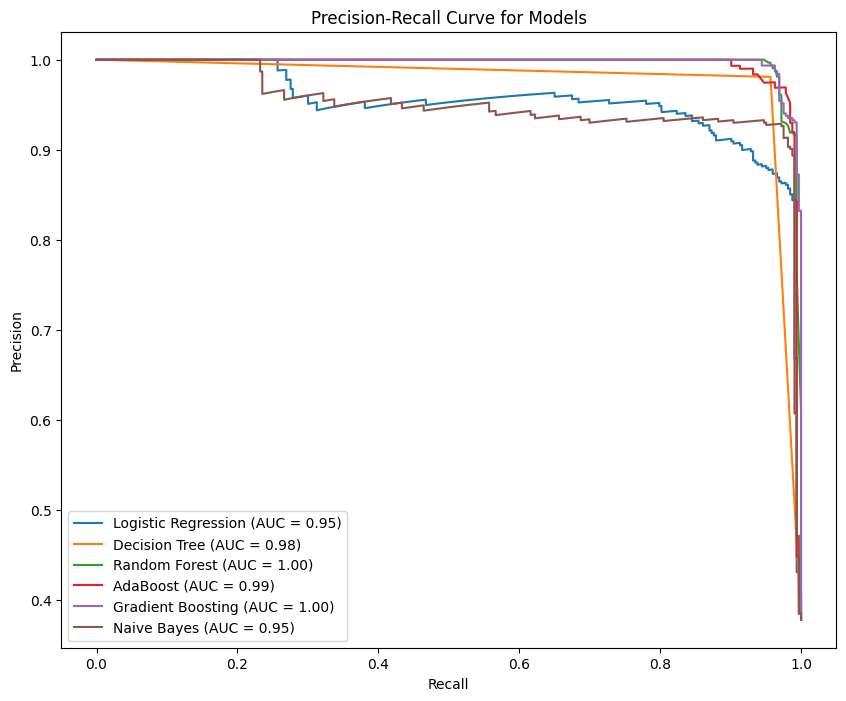

In [115]:
from sklearn.metrics import precision_recall_curve, auc


def build_models_pr_curve(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model, nb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']
  plt.figure(figsize=(10, 8))
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label = f'{name} (AUC = {pr_auc:.2f})')


  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title("Precision-Recall Curve for Models")
  plt.legend(loc = 'lower left')
  plt.show()

build_models_pr_curve(X_train, X_test, y_train, y_test)
